In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
housingData = pd.read_csv("/Users/ammarmalik/Desktop/ResumeProjects/HousingWebsite/Housing.csv")
housingData = housingData.drop('prev_sold_date',axis=1)
housingData.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0


In [3]:
forSaleHomes = housingData[housingData['status'] == 'for_sale']
readyBuild = housingData[housingData['status'] == 'ready_to_build']
print("Homes ready for sale: %d \nHomes ready to be built: %d" % (forSaleHomes.count()['status'], readyBuild.count()['status']))

Homes ready for sale: 903373 
Homes ready to be built: 1593


/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price', ylabel='state'>

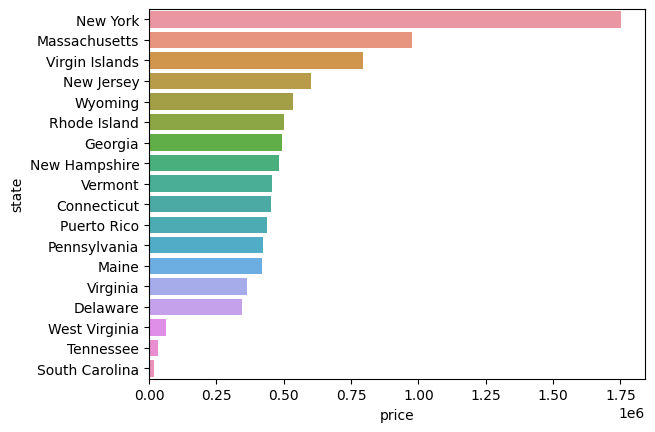

In [4]:
groupedData = housingData.groupby('state', as_index=False)['price'].mean().sort_values('price', ascending=False)
sns.barplot(data=groupedData,x='price',y='state')

/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price', ylabel='city-state'>

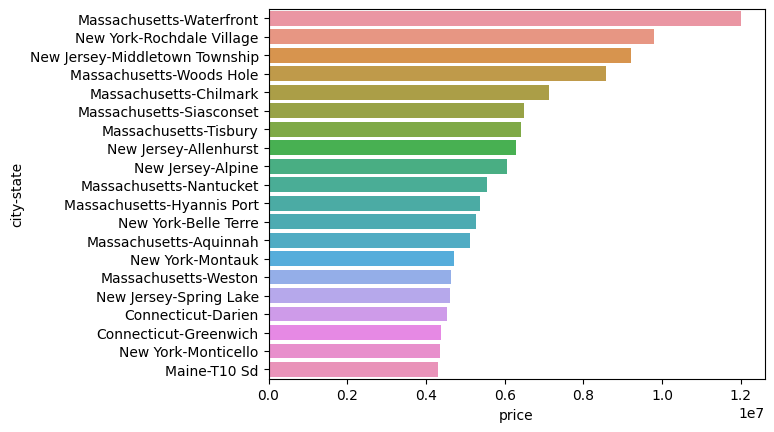

In [5]:
groupedData = housingData.groupby(['city','state'], as_index=False)['price'].mean().sort_values('price', ascending=False).head(20)
groupedData['city-state'] = groupedData['state'] + '-' + groupedData['city']
sns.barplot(data=groupedData,x='price',y='city-state')

/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ammarmalik/Desktop/ResumeProjects/Housing-Prediction-Website/housingPredictor/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ammar

<Axes: xlabel='bed', ylabel='price'>

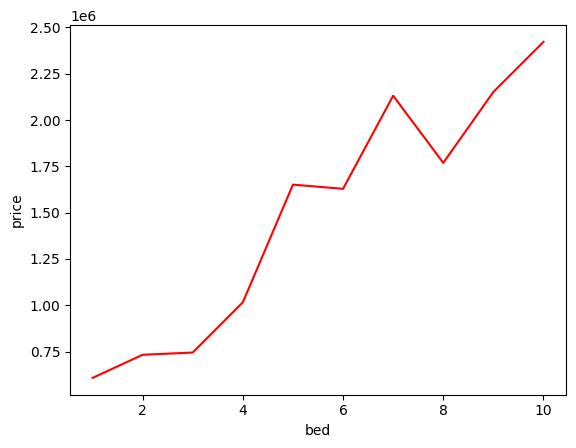

In [18]:
groupedData = housingData.groupby(['bed'], as_index=False)['price'].mean().sort_values('bed').head(10)
sns.lineplot(data=groupedData,x='bed',y='price', color='r')

In [7]:
lbEN = LabelEncoder()
cleanedData = housingData.copy()
cleanedData.state = lbEN.fit_transform(cleanedData.state)
cleanedData.city = lbEN.fit_transform(cleanedData.city)
cleanedData.status = lbEN.fit_transform(cleanedData.status)
imputer = SimpleImputer(strategy='median')
cleanedData = pd.DataFrame(imputer.fit_transform(cleanedData), columns=cleanedData.columns,index=cleanedData.index)
cleanedData.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,0.0,3.0,2.0,0.12,14.0,9.0,601.0,920.0,105000.0
1,0.0,4.0,2.0,0.08,14.0,9.0,601.0,1527.0,80000.0
2,0.0,2.0,1.0,0.15,1051.0,9.0,795.0,748.0,67000.0
3,0.0,4.0,2.0,0.10,1723.0,9.0,731.0,1800.0,145000.0
4,0.0,6.0,2.0,0.05,1284.0,9.0,680.0,1650.0,65000.0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
x = cleanedData.iloc[:, 0:8].values
y = cleanedData.iloc[:, 8].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = Pipeline([('scaler', StandardScaler()), ('decision tree', tree.DecisionTreeRegressor())])

In [9]:
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision tree', DecisionTreeRegressor())])

In [10]:
model.score(x_test,y_test)*100

97.4026334661647